Importando bibliotecas necessarias para manipualçao de dados


In [344]:
import pandas as pd
import numpy as np
import requests
import urllib.request
import os
from glob import glob

#Visualização de Dados
import seaborn as sns
import matplotlib.pyplot as plt 

    
    """
7Fazendo aquisição de dados na pagina web 
Metodo e ferramentas de Extração utilizados 
- Lib resquests

    """"

In [11]:

arquivos_meses2018 = {
    "vra_122018": "https://www.gov.br/anac/pt-br/assuntos/dados-e-estatisticas/percentuais-de-atrasos-e-cancelamentos-2/2018/vra_122018.csv",
    "vra_112018": "https://www.gov.br/anac/pt-br/assuntos/dados-e-estatisticas/percentuais-de-atrasos-e-cancelamentos-2/2018/vra_112018.csv",
    "vra_102018": "https://www.gov.br/anac/pt-br/assuntos/dados-e-estatisticas/percentuais-de-atrasos-e-cancelamentos-2/2018/vra_102018.csv",
    "vra_092018": "https://www.gov.br/anac/pt-br/assuntos/dados-e-estatisticas/percentuais-de-atrasos-e-cancelamentos-2/2018/vra_092018.csv",
    "vra_082018": "https://www.gov.br/anac/pt-br/assuntos/dados-e-estatisticas/percentuais-de-atrasos-e-cancelamentos-2/2018/vra_082018.csv",
    "vra_072018": "https://www.gov.br/anac/pt-br/assuntos/dados-e-estatisticas/percentuais-de-atrasos-e-cancelamentos-2/2018/vra_072018.csv",
    "vra_062018": "https://www.gov.br/anac/pt-br/assuntos/dados-e-estatisticas/percentuais-de-atrasos-e-cancelamentos-2/2018/vra_062018.csv",
    "vra_05.csv": "https://www.gov.br/anac/pt-br/assuntos/dados-e-estatisticas/percentuais-de-atrasos-e-cancelamentos-2/2018/vra_05.csv",
    "vra_04.csv": "https://www.gov.br/anac/pt-br/assuntos/dados-e-estatisticas/percentuais-de-atrasos-e-cancelamentos-2/2018/vra_04.csv",
    "vra_032018": "https://www.gov.br/anac/pt-br/assuntos/dados-e-estatisticas/percentuais-de-atrasos-e-cancelamentos-2/2018/vra_032018.csv",
    "vra-02_2018": "https://www.gov.br/anac/pt-br/assuntos/dados-e-estatisticas/percentuais-de-atrasos-e-cancelamentos-2/2018/vra-02_2018.csv",
    "vra-01_2018": "https://www.gov.br/anac/pt-br/assuntos/dados-e-estatisticas/percentuais-de-atrasos-e-cancelamentos-2/2018/vra-01_2018.csv"
}




In [12]:
#fazendo requisição dos aquivos
#utilizando a biblioteca requests para acessar o pacote de dados que precisamos para manipulação 


for i, url_arquivo in enumerate(arquivos_meses2018.values(), start=1):
    caminho_destino = 'C:\\Users\\tonho\\OneDrive\\Documentos\\portifoliodedados\\webscaping\\PortifolioDeDados\\caseGOL\\{}.csv'.format(list(arquivos_meses2018.keys())[i-1])
    # response = requests.get(url_arquivo)
    with open(caminho_destino, 'wb') as file:
        file.write(requests.get(url_arquivo).content)
        print(f"Arquivo {i} baixado em: {caminho_destino}")


Arquivo 1 baixado em: C:\Users\tonho\OneDrive\Documentos\portifoliodedados\webscaping\PortifolioDeDados\caseGOL\vra_122018.csv
Arquivo 2 baixado em: C:\Users\tonho\OneDrive\Documentos\portifoliodedados\webscaping\PortifolioDeDados\caseGOL\vra_112018.csv
Arquivo 3 baixado em: C:\Users\tonho\OneDrive\Documentos\portifoliodedados\webscaping\PortifolioDeDados\caseGOL\vra_102018.csv
Arquivo 4 baixado em: C:\Users\tonho\OneDrive\Documentos\portifoliodedados\webscaping\PortifolioDeDados\caseGOL\vra_092018.csv
Arquivo 5 baixado em: C:\Users\tonho\OneDrive\Documentos\portifoliodedados\webscaping\PortifolioDeDados\caseGOL\vra_082018.csv
Arquivo 6 baixado em: C:\Users\tonho\OneDrive\Documentos\portifoliodedados\webscaping\PortifolioDeDados\caseGOL\vra_072018.csv
Arquivo 7 baixado em: C:\Users\tonho\OneDrive\Documentos\portifoliodedados\webscaping\PortifolioDeDados\caseGOL\vra_062018.csv
Arquivo 8 baixado em: C:\Users\tonho\OneDrive\Documentos\portifoliodedados\webscaping\PortifolioDeDados\caseGOL

Acessando arquivos 

 


In [702]:

import glob
Lista_meses2018_original= glob.glob(r'C:\Users\tonho\OneDrive\Documentos\portifoliodedados\webscaping\PortifolioDeDados\caseGOL\*.csv')
# 'arquivos' agora é um array com o nome de todos os .csv que começam com 'arquivo'
lista_df_meses2018 = []
for arquivo_mes in Lista_meses2018_original:
   lista_df_meses2018.append(pd.read_csv(arquivo_mes,sep=';' , encoding='latin-1'))



C:\Users\tonho\AppData\Local\Temp\ipykernel_11316\1501066348.py:6: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  lista_df_meses2018.append(pd.read_csv(arquivo_mes,sep=';' , encoding='latin-1'))
C:\Users\tonho\AppData\Local\Temp\ipykernel_11316\1501066348.py:6: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  lista_df_meses2018.append(pd.read_csv(arquivo_mes,sep=';' , encoding='latin-1'))
C:\Users\tonho\AppData\Local\Temp\ipykernel_11316\1501066348.py:6: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  lista_df_meses2018.append(pd.read_csv(arquivo_mes,sep=';' , encoding='latin-1'))


In [896]:
for i, df_mes in enumerate(lista_df_meses2018):
    if 'Código DI' in df_mes.columns:
        lista_df_meses2018[i] = df_mes.rename(columns={'Código DI': 'Código Autorização (DI)'})

In [972]:
datasets2018_original= pd.concat(lista_df_meses2018, ignore_index=True)

In [973]:
datasets2018_original.duplicated().sum()

17

In [974]:
datasets2018_original.drop_duplicates(inplace=True)

Fazendo filtro de voos operados pro GOL, AZUL E LATAM do tipo N- Nacional.

In [975]:
datasets2018_original = datasets2018_original[datasets2018_original['ICAO Empresa Aérea'].isin(['GLO','AZU','TAM']) & datasets2018_original['Código Tipo Linha'].isin(['N'])]

In [976]:
datasets2018_original= datasets2018_original.reset_index(drop=True)

Excluindo coluna que não será utilizada para esta analise, o inplace= True garante que alteração sej afeota diretamente no dataset sem precisar criaer uma copia 

In [977]:
datasets2018_original.drop('Código Justificativa', axis= 1, inplace= True)

Verificando a persistencia de valores nulos e exibindo a soma de valores nulos por coluna

In [978]:
datasets2018_original.isnull().sum()

ICAO Empresa Aérea             0
Número Voo                     0
Código Autorização (DI)       82
Código Tipo Linha              0
ICAO Aeródromo Origem          0
ICAO Aeródromo Destino         0
Partida Prevista            8284
Partida Real               17455
Chegada Prevista            8284
Chegada Real               17455
Situação Voo                   0
dtype: int64

In [979]:
datasets2018_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 631627 entries, 0 to 631626
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   ICAO Empresa Aérea       631627 non-null  object        
 1   Número Voo               631627 non-null  object        
 2   Código Autorização (DI)  631545 non-null  object        
 3   Código Tipo Linha        631627 non-null  object        
 4   ICAO Aeródromo Origem    631627 non-null  object        
 5   ICAO Aeródromo Destino   631627 non-null  object        
 6   Partida Prevista         623343 non-null  datetime64[ns]
 7   Partida Real             614172 non-null  datetime64[ns]
 8   Chegada Prevista         623343 non-null  datetime64[ns]
 9   Chegada Real             614172 non-null  datetime64[ns]
 10  Situação Voo             631627 non-null  object        
dtypes: datetime64[ns](4), object(7)
memory usage: 53.0+ MB


Convertendo campos com dados de horarios de partida (origem ) e chegada(destino) em colunas do tipo pd.dateTime 

In [980]:

# Lista de colunas que devem ser convertidas para datetime
datasets2018_original['Partida Prevista'] = pd.to_datetime(datasets2018_original['Partida Prevista'], errors='coerce', format='%d/%m/%Y %H:%M')
datasets2018_original['Partida Real'] = pd.to_datetime(datasets2018_original['Partida Real'], errors='coerce', format='%d/%m/%Y %H:%M')
datasets2018_original['Chegada Prevista'] = pd.to_datetime(datasets2018_original['Chegada Prevista'], errors='coerce', format='%d/%m/%Y %H:%M')
datasets2018_original['Chegada Real'] = pd.to_datetime(datasets2018_original['Chegada Real'], errors='coerce', format='%d/%m/%Y %H:%M')


In [981]:
datasets2018_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 631627 entries, 0 to 631626
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   ICAO Empresa Aérea       631627 non-null  object        
 1   Número Voo               631627 non-null  object        
 2   Código Autorização (DI)  631545 non-null  object        
 3   Código Tipo Linha        631627 non-null  object        
 4   ICAO Aeródromo Origem    631627 non-null  object        
 5   ICAO Aeródromo Destino   631627 non-null  object        
 6   Partida Prevista         623343 non-null  datetime64[ns]
 7   Partida Real             614172 non-null  datetime64[ns]
 8   Chegada Prevista         623343 non-null  datetime64[ns]
 9   Chegada Real             614172 non-null  datetime64[ns]
 10  Situação Voo             631627 non-null  object        
dtypes: datetime64[ns](4), object(7)
memory usage: 53.0+ MB


In [847]:
datasets2018_original.shape

(631627, 11)

Coleta de dados dos Aerodromos nacionais para posterior analise usando informaçõs sobre cidades/aerodromos de origem e destino

In [848]:
#df_aerodromos_publicos_nacionais = pd.read_csv('cadastro-de-aerodromos-civis-publicos.csv', usecols=['Aeródromo','MUNICÍPIO ATENDIDO', 'UF'], sep=';' , encoding='utf-8')

In [ ]:
#df_aerodromos_publicos_nacionais.drop(0, axis=0)

In [766]:
#data_janeiro =datasets2018_original[datasets2018_original['Partida Prevista'].dt.month == 1]

Para garantir a existencia de um dataset com dados sobre voos nao realizados e outro sem dados missing, faremos a copia do dataset original, o dataset original sera usado no caso de analises de voos nao realizados e afins, ja o novo dataset 'datasets_voos_2018' tera colunas missing removidas para facilitar a manipulação de dados e a geração de modelos de Machine Learning.

In [982]:
datasets_voos_2018= datasets2018_original.copy()

In [983]:
datasets_voos_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 631627 entries, 0 to 631626
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   ICAO Empresa Aérea       631627 non-null  object        
 1   Número Voo               631627 non-null  object        
 2   Código Autorização (DI)  631545 non-null  object        
 3   Código Tipo Linha        631627 non-null  object        
 4   ICAO Aeródromo Origem    631627 non-null  object        
 5   ICAO Aeródromo Destino   631627 non-null  object        
 6   Partida Prevista         623343 non-null  datetime64[ns]
 7   Partida Real             614172 non-null  datetime64[ns]
 8   Chegada Prevista         623343 non-null  datetime64[ns]
 9   Chegada Real             614172 non-null  datetime64[ns]
 10  Situação Voo             631627 non-null  object        
dtypes: datetime64[ns](4), object(7)
memory usage: 53.0+ MB


In [984]:
datasets_voos_2018["Situação Voo"].value_counts()

Situação Voo
REALIZADO    614172
CANCELADO     17455
Name: count, dtype: int64

In [986]:
datasets_voos_2018[(datasets_voos_2018["Partida Prevista"].isnull()) & (datasets_voos_2018["Chegada Prevista"].isnull())].shape

(8284, 11)

In [987]:
datasets_voos_2018[(datasets_voos_2018["Partida Real"].isnull()) & (datasets_voos_2018["Chegada Real"].isnull())& (datasets_voos_2018['Situação Voo']== 'CANCELADO')].shape

(17455, 11)

In [988]:
datasets_voos_2018[datasets_voos_2018['Situação Voo']== 'CANCELADO'].head()

,ICAO Empresa Aérea,Número Voo,Código Autorização (DI),Código Tipo Linha,ICAO Aeródromo Origem,ICAO Aeródromo Destino,Partida Prevista,Partida Real,Chegada Prevista,Chegada Real,Situação Voo
11,AZU,2407,0,N,SBCF,SBGR,2018-01-05 15:30:00,NaT,2018-01-05 16:50:00,NaT,CANCELADO
12,AZU,2407,0,N,SBCF,SBGR,2018-01-12 15:30:00,NaT,2018-01-12 16:50:00,NaT,CANCELADO
13,AZU,2407,0,N,SBCF,SBGR,2018-01-19 15:30:00,NaT,2018-01-19 16:50:00,NaT,CANCELADO
14,AZU,2407,0,N,SBCF,SBGR,2018-01-26 15:30:00,NaT,2018-01-26 16:50:00,NaT,CANCELADO
88,AZU,2423,0,N,SBRP,SBKP,2018-01-01 10:00:00,NaT,2018-01-01 11:00:00,NaT,CANCELADO


In [989]:
datasets_voos_2018[datasets_voos_2018["Chegada Real"].isnull()].shape

(17455, 11)

In [990]:
datasets_voos_2018.drop(datasets_voos_2018[datasets_voos_2018['Situação Voo']== 'CANCELADO'].index, inplace= True)
#df = df.drop(df[df['product_name'] == 'Coca Cola'].index)

In [992]:
datasets_voos_2018.shape

(614172, 11)

In [995]:
datasets_voos_2018[(datasets_voos_2018["Partida Prevista"].isnull()) & (datasets_voos_2018["Chegada Prevista"].isnull())].shape

(8284, 11)

In [996]:
datasets_voos_2018.drop(datasets_voos_2018[datasets_voos_2018['Chegada Prevista'].isnull()].index, inplace= True)

In [998]:
datasets_voos_2018.info()

<class 'pandas.core.frame.DataFrame'>
Index: 605888 entries, 15 to 631626
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   ICAO Empresa Aérea       605888 non-null  object        
 1   Número Voo               605888 non-null  object        
 2   Código Autorização (DI)  605806 non-null  object        
 3   Código Tipo Linha        605888 non-null  object        
 4   ICAO Aeródromo Origem    605888 non-null  object        
 5   ICAO Aeródromo Destino   605888 non-null  object        
 6   Partida Prevista         605888 non-null  datetime64[ns]
 7   Partida Real             605888 non-null  datetime64[ns]
 8   Chegada Prevista         605888 non-null  datetime64[ns]
 9   Chegada Real             605888 non-null  datetime64[ns]
 10  Situação Voo             605888 non-null  object        
dtypes: datetime64[ns](4), object(7)
memory usage: 55.5+ MB


dropna(inplace =True) será usado para remoção de dados faltantes. 

optamos pela remoção por dois motivos: 1- os dados faltantes nao correspondiam a mais do que 10% dos dados analisados, 2- como se trata da analise de dados temporais, a remoção pode ajudar na garantia da precisão dos dados utilizados, o mesmo serve para a escolha de nao fazer balanceamento de dados ainda. 

#datasets2018_original.isna().sum() - para analisar se os dados faltantes permancem no dataset e nos garantir que um novo conjunto de dados foi criado.

Preparando as colunas com ifnromações de horario de 'Partida Prevista', 'Partida Real', 'Chegada Prevista', 'Chegada Real'.
As colunas estão dispostas no formato data e hora, contudo no tipo object. A conversão para o tipo to_datetime vai facilitar na manipulação desses dados para geração de informações como as de pontualidade.

Criando uma coluna "Status horario voo". Essa coluna vai guardar a indicação de voo "atrasado==1" ou "pontual == 0"

A construção dessa coluna será baseada em:
Um voo pode ser dado como pontual ou atrasado, levando-se em conta apenas os dados de 
“Partida Prevista somando 15 minuto” (Paertida_prevista + 15) e “Partida Real”, sendo:
Se Partida Real > Partida Prevista + 15 minutos → Voo atrasado (1)
Se Partida Real <= Partida Prevista + 15 minutos → Voo pontual(0)

No codigo baixo, o iterrows(): intera sobre todas as colunas do cojunto de dados fazendo a verificação da condição estabelecidade no bloco condional if

lista_datasets2018.at[i, "Status horario voo"] : correponde a uma nova coluna em que cada linha "i" recebe um rotulo para o voo de acordo com a metrica disponibilizada acima.

lista_datasets2018.at[i, "Status horario voo"] = np.nan: recebe NaN pois a partida real do voo está sem valor (NaN), o que indica um voo nao realizado/cancelado.

As condições são baseadas na existencia de um valor da linha na linha 'Partida Real' o que pode servir como premissa de garantia de que o voo realmente aconteceu.

In [999]:
# Supondo que 'Status horario voo' seja uma coluna existente em datasets_voos_2018

"""""
for i, row in datasets_voos_2018.iterrows():
    if row['Partida Real'] > row['Partida Prevista'] + pd.Timedelta(minutes=15):
        #Voo atrasado (1)
        datasets_voos_2018.at[i, "Status horario voo"] = 1    
    elif row['Partida Real'] <= row['Partida Prevista'] + pd.Timedelta(minutes=15): 
        # Voo pontual(0)
        datasets_voos_2018.at[i, "Status horario voo"] = 0
    elif pd.isna(row['Partida Real']):
        datasets_voos_2018.at[i, "Status horario voo"] = np.nan
"""
import numpy as np

# Criação de uma nova coluna com base em duas colunas existentes
datasets_voos_2018['Status horario voo'] = np.where(
    datasets_voos_2018['Partida Real'] > (datasets_voos_2018['Partida Prevista'] + pd.Timedelta(minutes=15)),
    1,  0)  # Se a condição for verdadeira
    #np.where(
    #    datasets_voos_2018['Partida Real'] <= datasets_voos_2018['Partida Prevista'] + pd.Timedelta(minutes=15),
     #   0,  # Se a segunda condição for verdadeira
     #   datasets_voos_2018  # Caso contrário (outras situações)
    #)
    #)







In [1122]:
datasets_voos_2018.info()

<class 'pandas.core.frame.DataFrame'>
Index: 605888 entries, 15 to 631626
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   ICAO Empresa Aérea       605888 non-null  object        
 1   Número Voo               605888 non-null  object        
 2   Código Autorização (DI)  605806 non-null  object        
 3   Código Tipo Linha        605888 non-null  object        
 4   ICAO Aeródromo Origem    605888 non-null  object        
 5   ICAO Aeródromo Destino   605888 non-null  object        
 6   Partida Prevista         605888 non-null  datetime64[ns]
 7   Partida Real             605888 non-null  datetime64[ns]
 8   Chegada Prevista         605888 non-null  datetime64[ns]
 9   Chegada Real             605888 non-null  datetime64[ns]
 10  Situação Voo             605888 non-null  object        
 11  Status horario voo       605888 non-null  int32         
 12  Mes_Partida         

In [1001]:
datasets_voos_2018['Status horario voo'].value_counts()

Status horario voo
0    517570
1     88318
Name: count, dtype: int64

In [1041]:
datasets_voos_2018[datasets_voos_2018['ICAO Empresa Aérea']== 'TAM']['Status horario voo'].value_counts()

Status horario voo
0    154142
1     30182
Name: count, dtype: int64

,ICAO Empresa Aérea,Número Voo,Código Autorização (DI),Código Tipo Linha,ICAO Aeródromo Origem,ICAO Aeródromo Destino,Partida Prevista,Partida Real,Chegada Prevista,Chegada Real,Situação Voo,Status horario voo
15,AZU,2414,0,N,SBKP,SBAU,2018-01-06 13:15:00,2018-01-06 13:09:00,2018-01-06 14:40:00,2018-01-06 14:35:00,REALIZADO,0
16,AZU,2414,0,N,SBKP,SBAU,2018-01-13 13:15:00,2018-01-13 13:09:00,2018-01-13 14:40:00,2018-01-13 14:36:00,REALIZADO,0
17,AZU,2414,0,N,SBKP,SBAU,2018-01-20 13:15:00,2018-01-20 13:15:00,2018-01-20 14:40:00,2018-01-20 14:31:00,REALIZADO,0
18,AZU,2414,0,N,SBKP,SBAU,2018-01-27 13:15:00,2018-01-27 13:09:00,2018-01-27 14:40:00,2018-01-27 14:26:00,REALIZADO,0
20,AZU,2417,0,N,SBSV,SBIL,2018-01-01 13:20:00,2018-01-01 13:12:00,2018-01-01 14:10:00,2018-01-01 13:49:00,REALIZADO,0


Os dados 'NaN' na coluna Partida Real  não foram removidos ou substituidos pois serão utilizados para a analise de voos cancelados/não realizados. Observações como número de voos cancelados por companhia, por data e determinados horarios (manhã, tarde e noite.)

INICIANDO ANALISE EXPLORATORIA

In [1124]:
df_corr_voos2018 = lista_datasets2018[['Partida Prevista','Partida Real','Chegada Prevista','Chegada Real','Status horario voo']]

In [1125]:

df_corr_voos2018 = df_corr_voos2018.corr()
df_corr_voos2018.style.background_gradient(cmap='coolwarm').format(precision=2)

,Partida Prevista,Partida Real,Chegada Prevista,Chegada Real,Status horario voo
Partida Prevista,1.00,1.00,1.00,1.00,-0.08
Partida Real,1.00,1.00,1.00,1.00,-0.08
Chegada Prevista,1.00,1.00,1.00,1.00,-0.08
Chegada Real,1.00,1.00,1.00,1.00,-0.08
Status horario voo,-0.08,-0.08,-0.08,-0.08,1.00


In [1126]:
desc_stats = lista_datasets2018[['Partida Real', 'Chegada Real']].describe()
print(desc_stats)

                        Partida Real                   Chegada Real
count                          61807                          61807
mean   2018-12-16 10:32:01.989094912  2018-12-16 12:15:38.361673984
min              2018-12-01 00:05:00            2018-12-01 01:55:00
25%              2018-12-08 17:37:00            2018-12-08 19:24:00
50%              2018-12-16 13:42:00            2018-12-16 15:20:00
75%              2018-12-23 19:15:30            2018-12-23 20:47:00
max              2019-01-01 02:58:00            2019-01-01 04:03:00


In [917]:
#dados_janeiro = datasets_voos_2018[(datasets_voos_2018['Partida Real'].dt.month ==1) & (datasets_voos_2018['Partida Real'].dt.year == 2018)]
#voos_pontuais_por_mes_companhia = datasets_voos_2018.groupby(['Mes_Partida', 'ICAO Empresa Aérea'])[Status horario voo]== 0].sum().reset_index()

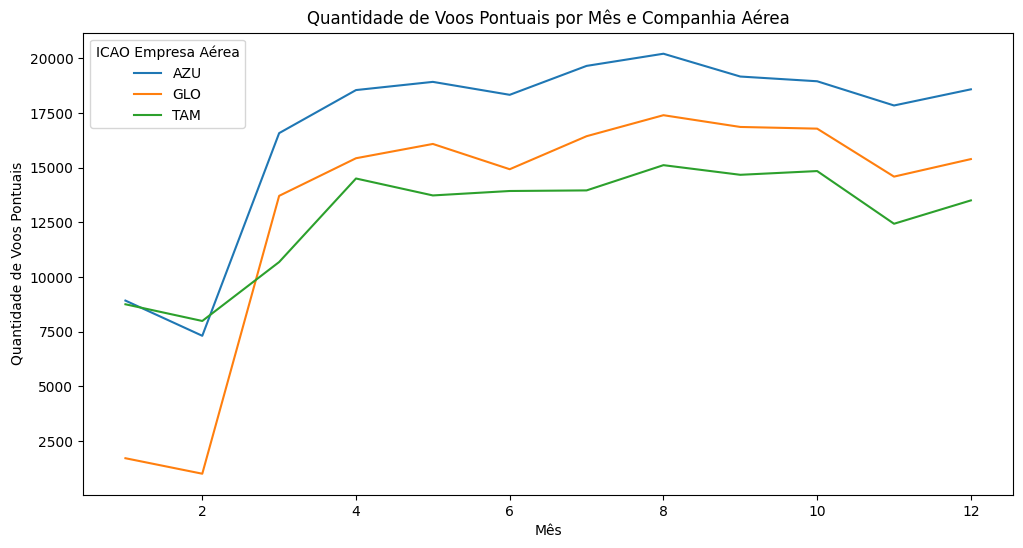

In [1169]:
datasets_voos_2018['Mes_Partida'] = datasets_voos_2018['Partida Real'].dt.month
voos_pontuais_por_mes_companhia = datasets_voos_2018[datasets_voos_2018['Status horario voo'] == 0].groupby(['Mes_Partida', 'ICAO Empresa Aérea']).size().reset_index(name='Quantidade_Pontuais')
# Voo pontual(0)

plt.figure(figsize=(12, 6))
sns.lineplot(x='Mes_Partida', y='Quantidade_Pontuais', hue='ICAO Empresa Aérea', data=voos_pontuais_por_mes_companhia)
plt.title('Quantidade de Voos Pontuais por Mês e Companhia Aérea')
plt.xlabel('Mês')
plt.ylabel('Quantidade de Voos Pontuais')
plt.show()


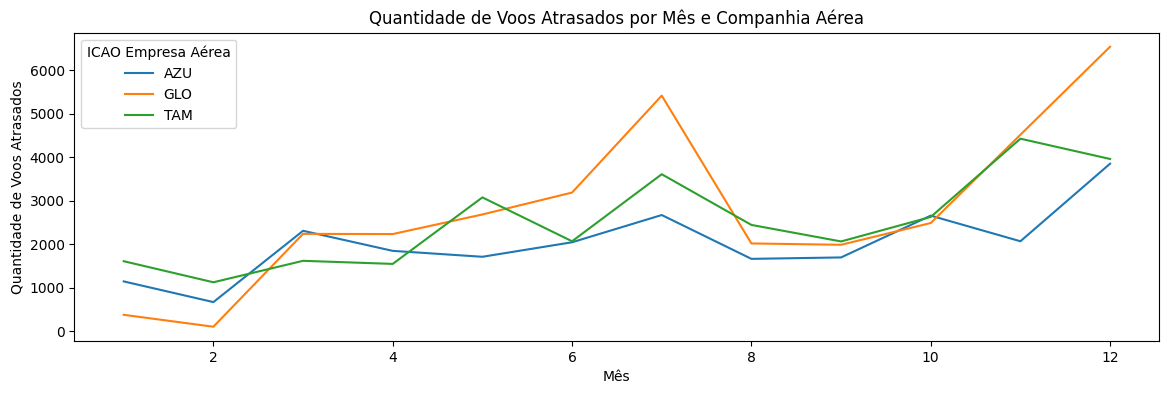

In [1128]:
datasets_voos_2018['Mes_Partida'] = datasets_voos_2018['Partida Real'].dt.month

#voos_pontuais_por_mes_companhia = datasets_voos_2018.groupby(['Mes_Partida', 'ICAO Empresa Aérea'])[Status horario voo]== 0].sum().reset_index()

voos_pontuais_por_mes_companhia = datasets_voos_2018[datasets_voos_2018['Status horario voo'] == 1].groupby(['Mes_Partida', 'ICAO Empresa Aérea']).size().reset_index(name='Quantidade_Pontuais')
# Voo pontual(0)


plt.figure(figsize=(14, 4))
sns.lineplot(x='Mes_Partida', y='Quantidade_Pontuais', hue='ICAO Empresa Aérea', data=voos_pontuais_por_mes_companhia)
plt.title('Quantidade de Voos Atrasados por Mês e Companhia Aérea')
plt.xlabel('Mês')
plt.ylabel('Quantidade de Voos Atrasados')
plt.show()


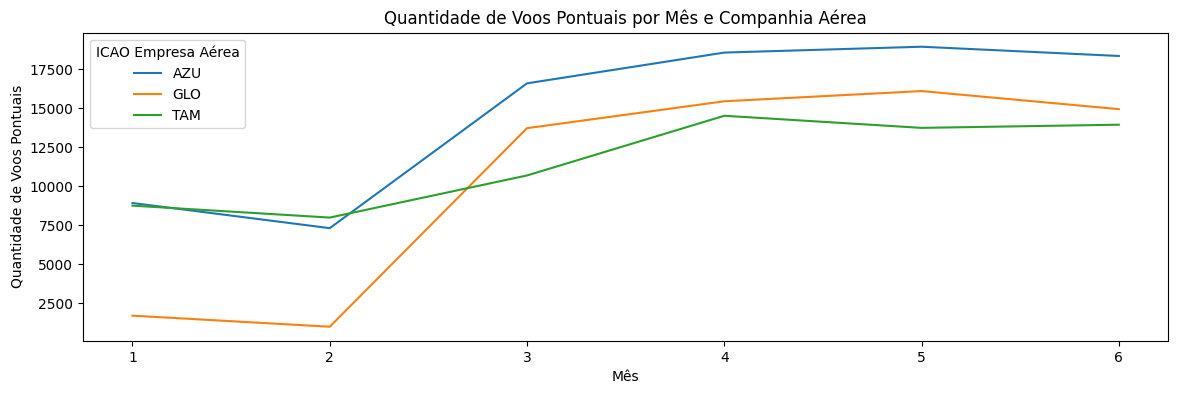

In [1144]:
voos_primeiros_meses = datasets_voos_2018[datasets_voos_2018['Mes_Partida'].isin([1, 2, 3, 4, 5, 6])]

#datasets_voos_2018['Mes_Partida'] = datasets_voos_2018['Partida Real'].dt.month.isin([1, 2, 3])
#voos_pontuais_por_mes_companhia = datasets_voos_2018.groupby(['Mes_Partida', 'ICAO Empresa Aérea'])[Status horario voo]== 0].sum().reset_index()
voos_pontuais_por_mes_companhia = voos_primeiros_meses[voos_primeiros_meses['Status horario voo'] == 0].groupby(['Mes_Partida', 'ICAO Empresa Aérea']).size().reset_index(name='Quantidade_Pontuais')


plt.figure(figsize=(14, 4))
sns.lineplot(x='Mes_Partida', y='Quantidade_Pontuais', hue='ICAO Empresa Aérea', data=voos_pontuais_por_mes_companhia)
plt.title('Quantidade de Voos Pontuais por Mês e Companhia Aérea')
plt.xlabel('Mês')
plt.ylabel('Quantidade de Voos Pontuais')
plt.show()

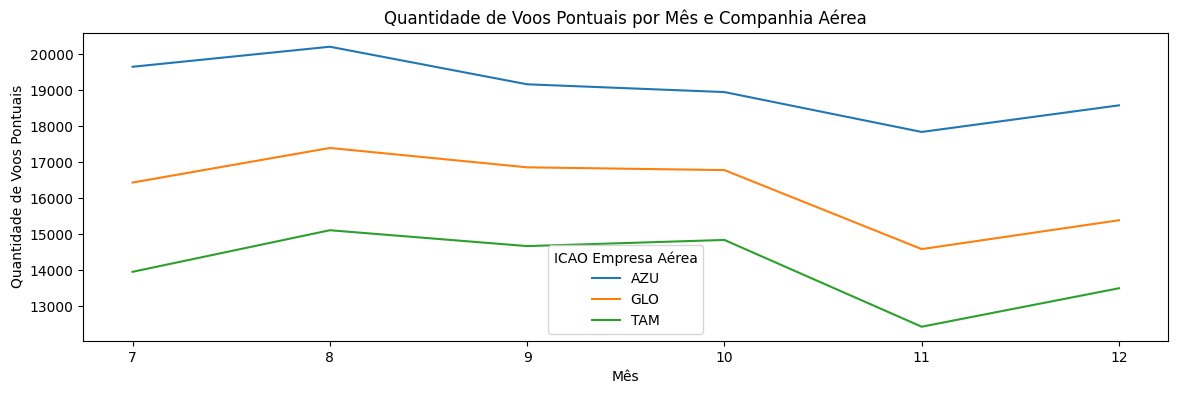

In [1146]:
voos_primeiros_meses = datasets_voos_2018[datasets_voos_2018['Mes_Partida'].isin([7, 8, 9, 10, 11, 12])]

#datasets_voos_2018['Mes_Partida'] = datasets_voos_2018['Partida Real'].dt.month.isin([1, 2, 3])
#voos_pontuais_por_mes_companhia = datasets_voos_2018.groupby(['Mes_Partida', 'ICAO Empresa Aérea'])[Status horario voo]== 0].sum().reset_index()
voos_pontuais_por_mes_companhia = voos_primeiros_meses[voos_primeiros_meses['Status horario voo'] == 0].groupby(['Mes_Partida', 'ICAO Empresa Aérea']).size().reset_index(name='Quantidade_Pontuais')


plt.figure(figsize=(14, 4))
sns.lineplot(x='Mes_Partida', y='Quantidade_Pontuais', hue='ICAO Empresa Aérea', data=voos_pontuais_por_mes_companhia)
plt.title('Quantidade de Voos Pontuais por Mês e Companhia Aérea')
plt.xlabel('Mês')
plt.ylabel('Quantidade de Voos Pontuais')
plt.show()

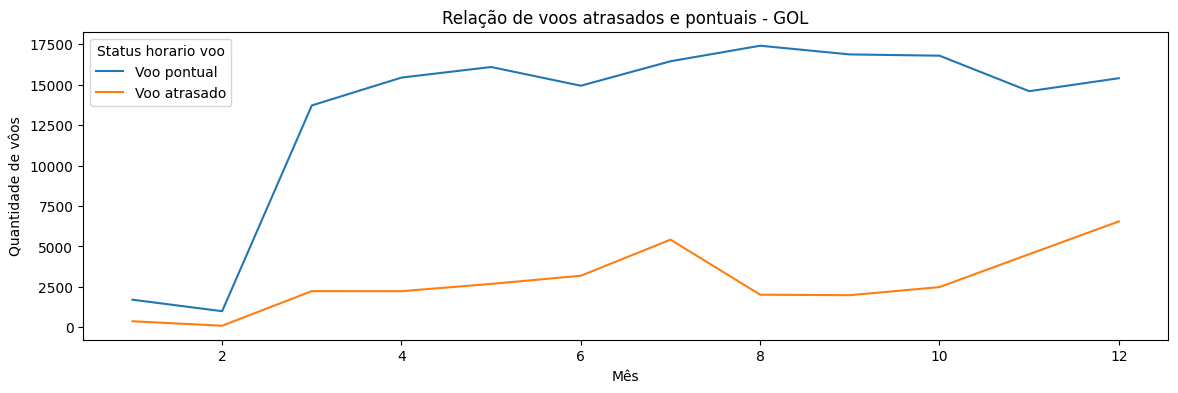

In [1179]:
datasets_voos_2018['Mes_Partida'] = datasets_voos_2018['Partida Real'].dt.month

#voos_pontuais_por_mes_companhia = datasets_voos_2018.groupby(['Mes_Partida', 'ICAO Empresa Aérea'])[Status horario voo]== 0].sum().reset_index()

voos_pontuais_por_mes_companhia = datasets_voos_2018[datasets_voos_2018['ICAO Empresa Aérea'] == 'GLO'].groupby(['Mes_Partida', 'Status horario voo']).size().reset_index(name='Quantidade_Pontuais')
# Voo pontual(0)
voos_pontuais_por_mes_companhia = voos_pontuais_por_mes_companhia.replace({'Status horario voo': {0: 'Voo pontual', 1: 'Voo atrasado'}})


plt.figure(figsize=(14, 4))
sns.lineplot(x='Mes_Partida', y='Quantidade_Pontuais', hue='Status horario voo', data=voos_pontuais_por_mes_companhia)
plt.title('Relação de voos atrasados e pontuais - GOL')
plt.xlabel('Mês')
plt.ylabel('Quantidade de vôos')
plt.show()

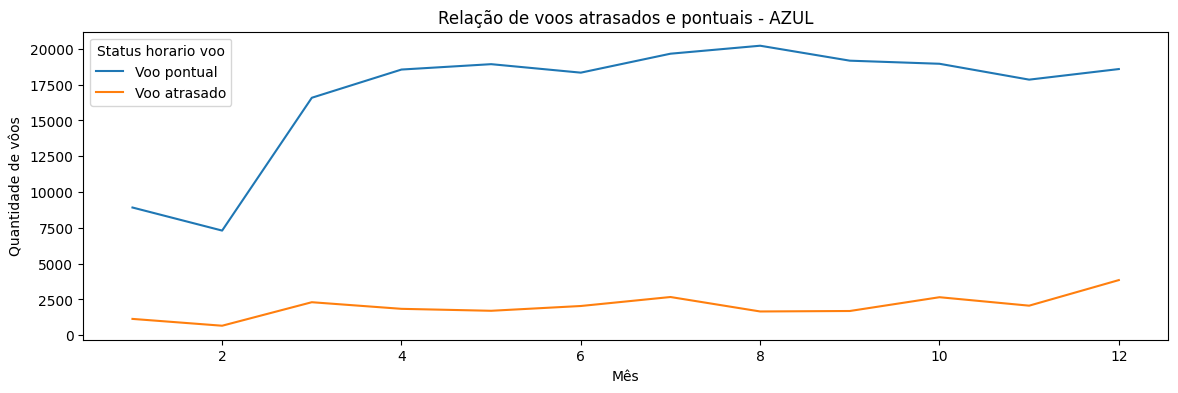

In [1178]:
voos_pontuais_por_mes_companhia = datasets_voos_2018[datasets_voos_2018['ICAO Empresa Aérea'] == 'AZU'].groupby(['Mes_Partida', 'Status horario voo']).size().reset_index(name='Quantidade_Pontuais')
# Voo pontual(0)
voos_pontuais_por_mes_companhia = voos_pontuais_por_mes_companhia.replace({'Status horario voo': {0: 'Voo pontual', 1: 'Voo atrasado'}})


plt.figure(figsize=(14, 4))
sns.lineplot(x='Mes_Partida', y='Quantidade_Pontuais', hue='Status horario voo', data=voos_pontuais_por_mes_companhia)
plt.title('Relação de voos atrasados e pontuais - AZUL')
plt.xlabel('Mês')
plt.ylabel('Quantidade de vôos')
plt.show()

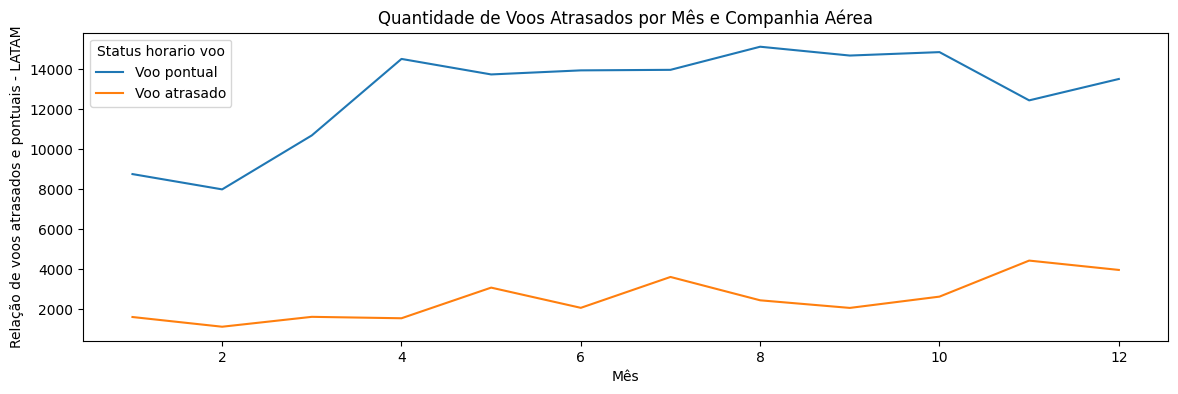

In [1175]:
voos_pontuais_por_mes_companhia = datasets_voos_2018[datasets_voos_2018['ICAO Empresa Aérea'] == 'TAM'].groupby(['Mes_Partida', 'Status horario voo']).size().reset_index(name='Quantidade_Pontuais')
# Voo pontual(0)
voos_pontuais_por_mes_companhia = voos_pontuais_por_mes_companhia.replace({'Status horario voo': {0: 'Voo pontual', 1: 'Voo atrasado'}})


plt.figure(figsize=(14, 4))
sns.lineplot(x='Mes_Partida', y='Quantidade_Pontuais', hue='Status horario voo', data=voos_pontuais_por_mes_companhia)
plt.title('Relação de voos atrasados e pontuais - LATAM')
plt.xlabel('Mês')
plt.ylabel('Quantidade de vôos')
plt.show()

SERIES TEMPORAIS DO INDICADOR DE PONTUALIDADE

 voos 1 − (𝑣𝑜𝑜𝑠 𝑎𝑡𝑟𝑎𝑠𝑎𝑑𝑜𝑠/𝑣𝑜𝑜𝑠 𝑟𝑒𝑎𝑙𝑖𝑧𝑎𝑑𝑜) # Voo pontual(0)
 
O resultado da fórmula é uma porcentagem que representa a pontualidade dos voos. Quanto mais próximo de 1, maior é a pontualidade, e quanto mais próximo de 0, menor é a pontualidade.

In [1229]:
datasets_voos_2018.info()

<class 'pandas.core.frame.DataFrame'>
Index: 605888 entries, 15 to 631626
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   ICAO Empresa Aérea       605888 non-null  object        
 1   Número Voo               605888 non-null  object        
 2   Código Autorização (DI)  605806 non-null  object        
 3   Código Tipo Linha        605888 non-null  object        
 4   ICAO Aeródromo Origem    605888 non-null  object        
 5   ICAO Aeródromo Destino   605888 non-null  object        
 6   Partida Prevista         605888 non-null  datetime64[ns]
 7   Partida Real             605888 non-null  datetime64[ns]
 8   Chegada Prevista         605888 non-null  datetime64[ns]
 9   Chegada Real             605888 non-null  datetime64[ns]
 10  Situação Voo             605888 non-null  object        
 11  Status horario voo       605888 non-null  int32         
 12  Mes_Partida         

In [1234]:
total_voos = len(datasets_voos_2018)
voos_atrasados = len(datasets_voos_2018[(datasets_voos_2018['Status horario voo'] == 1) & (datasets_voos_2018['ICAO Empresa Aérea'] =='GLO')])

porcentagem_pontualidade = 1 - (voos_atrasados / total_voos)
print(f'A porcentagem de voos pontuais é: {porcentagem_pontualidade * 100:.2f}%')


A porcentagem de voos pontuais é: 94.42%


In [1270]:


# Total de voos
total_voos = len(datasets_voos_2018)

# Calcular a porcentagem de voos pontuais mensalmente para a empresa 'GLO'
porcentagens_pontualidade = []
lista_meses = []

dados_pontualidade_gol = pd.DataFrame(columns=['mes', 'porcentagem'])
for mes in range(1, 13):
    voos_atrasados = len(datasets_voos_2018[
        (datasets_voos_2018['Status horario voo'] == 1) &
        (datasets_voos_2018['ICAO Empresa Aérea'] == 'GLO') &
        (datasets_voos_2018['Mes_Partida'] == mes)
    ])
    
    porcentagem_pontualidade_mes = 1 - (voos_atrasados / total_voos)
    porcentagens_pontualidade.append({ porcentagem_pontualidade_mes,mes})
    

# Exibir as porcentagens mensais
#for mes, porcentagem in enumerate(porcentagens_pontualidade, start=1):
   # print(f'Mês {mes}: Porcentagem de voos pontuais da GLO: {porcentagem * 100:.2f}%')

In [1271]:
porcentagens_pontualidade

[{0.9993810737297982, 1},
 {0.999833302524559, 2},
 {0.9963062480194359, 3},
 {0.9963128498996514, 4},
 {0.9955684879053555, 5},
 {0.9947366509982043, 6},
 {0.9910544523080174, 7},
 {0.9966693514312877, 8},
 {0.9967205160029576, 9},
 {0.9958936305059681, 10},
 {0.9925398753565016, 11},
 {0.9891960230273582, 12}]

In [1275]:
pontualidade_gol = pd.DataFrame({'mes': range(1, 13), 'Indice de pontualidade': porcentagem_pontualidade})


In [1276]:
pontualidade_gol

,mes,Indice de pontualidade
0,1,0.944212
1,2,0.944212
2,3,0.944212
3,4,0.944212
4,5,0.944212
5,6,0.944212
6,7,0.944212
7,8,0.944212
8,9,0.944212
9,10,0.944212


In [1249]:
porcentagens_pontualidade

[]

In [1248]:
dados_pontualidade_gol

,mes,porcentagem


In [1238]:
porcentagens_pontualidade

[0.9993810737297982,
 0.999833302524559,
 0.9963062480194359,
 0.9963128498996514,
 0.9955684879053555,
 0.9947366509982043,
 0.9910544523080174,
 0.9966693514312877,
 0.9967205160029576,
 0.9958936305059681,
 0.9925398753565016,
 0.9891960230273582]

In [1240]:

plt.figure(figsize=(14, 4))
sns.lineplot(x='Mes_Partida', y='Quantidade_Pontuais', hue='ICAO Empresa Aérea', data=porcentagens_pontualidade)
plt.title('Quantidade de Voos Atrasados por Mês e Companhia Aérea')
plt.xlabel('Mês')
plt.ylabel('Quantidade de Voos Atrasados')
plt.show()

TypeError: Data source must be a DataFrame or Mapping, not <class 'list'>.

<Figure size 1400x400 with 0 Axes>

In [ ]:

total_voos = len(datasets_voos_2018)
voos_atrasados = len(datasets_voos_2018[(datasets_voos_2018['Status horario voo'] == 1) & (datasets_voos_2018['ICAO Empresa Aérea'] =='GLO')])

porcentagem_pontualidade = 1 - (voos_atrasados / total_voos)
print(f'A porcentagem de voos pontuais é: {porcentagem_pontualidade * 100:.2f}%')

In [1222]:
total_Voos = datasets_voos_2018.loc[:, ['Status horario voo']].sum()

In [1223]:
total_Voos

Status horario voo    88318
dtype: int64

In [1225]:
total_atrasados

88318

count
517570    1
88318     1
Name: count, dtype: int64

MAIOR NUMERO DE ATRASO MENSAL POR AEROPORTO DE ORIGEM DE CADA COMPANHIA AEREA

In [1134]:

#datasets_voos_2018[datasets_voos_2018['ICAO Empresa Aérea']== 'TAM']['Status horario voo'].value_counts()
atrasos_mes_poraerodromo = datasets_voos_2018[datasets_voos_2018['Status horario voo'] == 1].groupby(['Mes_Partida', 'ICAO Empresa Aérea','ICAO Aeródromo Origem']).size().reset_index(name='Quantidade_Atrasados')

df_atrasos_mes_poraerodromo = atrasos_mes_poraerodromo.groupby(['Mes_Partida', 'ICAO Empresa Aérea'])['ICAO Aeródromo Origem'].value_counts().reset_index(name='Quantidade_Ocorrencias')

In [1135]:
df_atrasos_mes_poraerodromo


,Mes_Partida,ICAO Empresa Aérea,ICAO Aeródromo Origem,Quantidade_Ocorrencias
0,1,AZU,SBBE,1
1,1,AZU,SBBR,1
2,1,AZU,SBMG,1
3,1,AZU,SBMA,1
4,1,AZU,SBLO,1
...,...,...,...,...
2093,12,TAM,SBJA,1
2094,12,TAM,SBIZ,1
2095,12,TAM,SBIL,1
2096,12,TAM,SBGR,1


In [1159]:
idx_max = atrasos_mes_poraerodromo.groupby(['Mes_Partida', 'ICAO Empresa Aérea'])['Quantidade_Atrasados'].idxmax()

maiores_atrasos_por_mes_poraerodromo = atrasos_mes_poraerodromo.loc[idx_max]

maiores_atrasos_por_mes_poraerodromo['ICAO Empresa Aérea'].replace({'AZU': 'AZUL', 'TAM': 'LATAM', 'GLO': 'GOL'}, inplace=True)

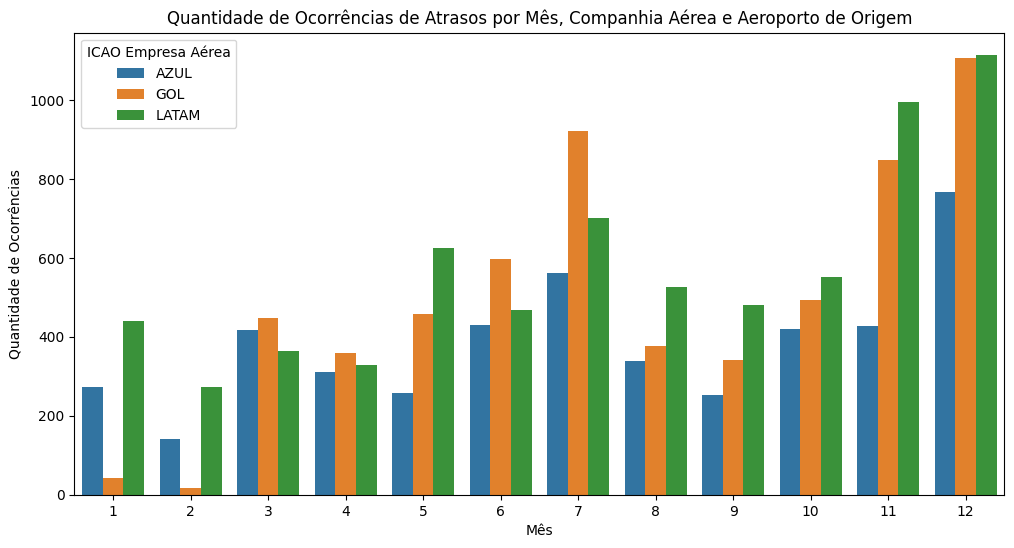

In [1239]:
plt.figure(figsize=(12, 6))
ax =sns.barplot(x='Mes_Partida', y='Quantidade_Atrasados', hue='ICAO Empresa Aérea', data=maiores_atrasos_por_mes_poraerodromo)
#handles, labels = ax.get_legend_handles_labels()

# Adicionar rótulos 'ICAO Aeródromo Origem' às legendas


#plt.legend(handles, labels, title='Companhia Aérea')
plt.title('Quantidade de Ocorrências de Atrasos por Mês, Companhia Aérea e Aeroporto de Origem')
plt.xlabel('Mês')
plt.ylabel('Quantidade de Ocorrências')
plt.show()

In [ ]:

#datasets_voos_2018['Mes_Partida'] = datasets_voos_2018['Partida Real'].dt.month
#datasets_voos_2018[(datasets_voos_2018['ICAO Empresa Aérea']== 'AZU') &(datasets_voos_2018['Status horario voo'] == 1)]



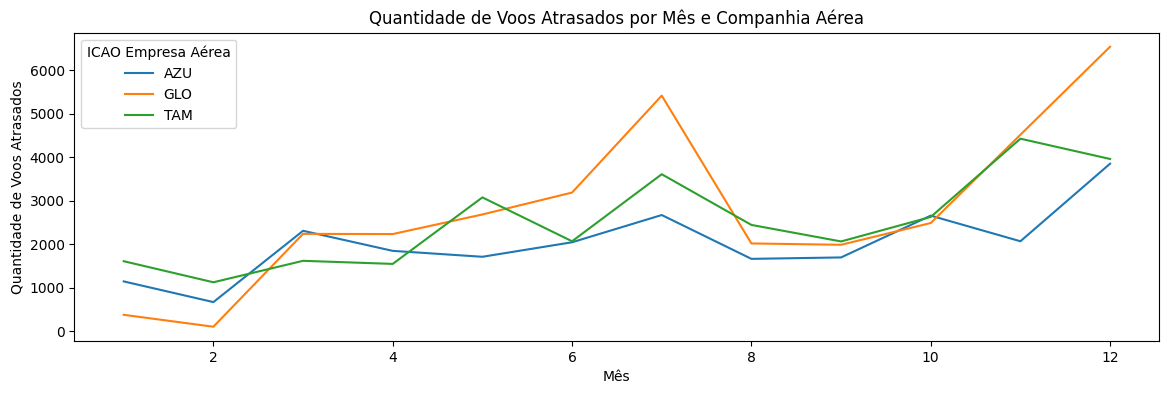

In [1029]:
datasets_voos_2018['Mes_Partida'] = datasets_voos_2018['Partida Real'].dt.month

#voos_pontuais_por_mes_companhia = datasets_voos_2018.groupby(['Mes_Partida', 'ICAO Empresa Aérea'])[Status horario voo]== 0].sum().reset_index()

voos_pontuais_por_mes_companhia = datasets_voos_2018[datasets_voos_2018['Status horario voo'] == 1].groupby(['Mes_Partida', 'ICAO Empresa Aérea']).size().reset_index(name='Quantidade_Pontuais')
# Voo pontual(0)

plt.figure(figsize=(14, 4))
sns.lineplot(x='Mes_Partida', y='Quantidade_Pontuais', hue='ICAO Empresa Aérea', data=voos_pontuais_por_mes_companhia)
plt.title('Quantidade de Voos Atrasados por Mês e Companhia Aérea')
plt.xlabel('Mês')
plt.ylabel('Quantidade de Voos Atrasados')
plt.show()



Text(0.5, 1.0, 'Status de voos por compania - Gol')

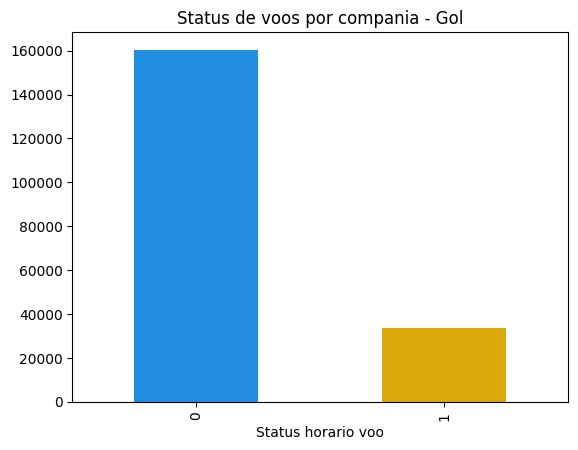

<Figure size 800x400 with 0 Axes>

In [1016]:
plot = datasets_voos_2018[datasets_voos_2018['ICAO Empresa Aérea']== 'GLO']['Status horario voo'].value_counts().plot(kind="bar", color = ['#218EDF','#DCA90C'])
plt.figure(figsize=(8,4), )
plot.set_title("Status de voos por compania - Gol")

Text(0.5, 1.0, 'Voos por companhia aerea Janeiro')

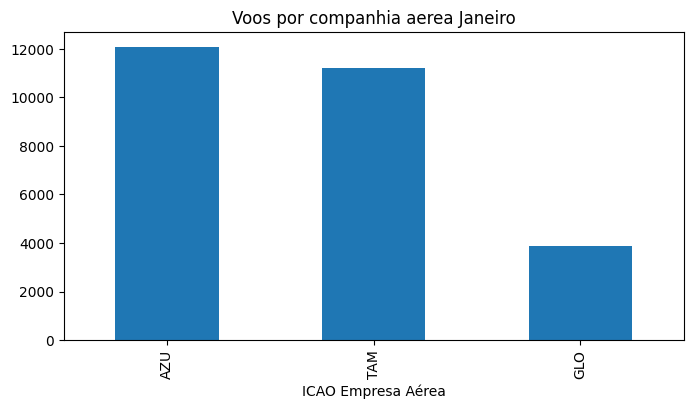

In [783]:
voos_efetivados_janeiro = dados_janeiro[dados_janeiro['Situação Voo'] == 'REALIZADO']
plt.figure(figsize=(8,4))
plot = voos_efetivados_janeiro['ICAO Empresa Aérea'].value_counts().plot(kind="bar")
plot.set_title("Voos por companhia aerea Janeiro")

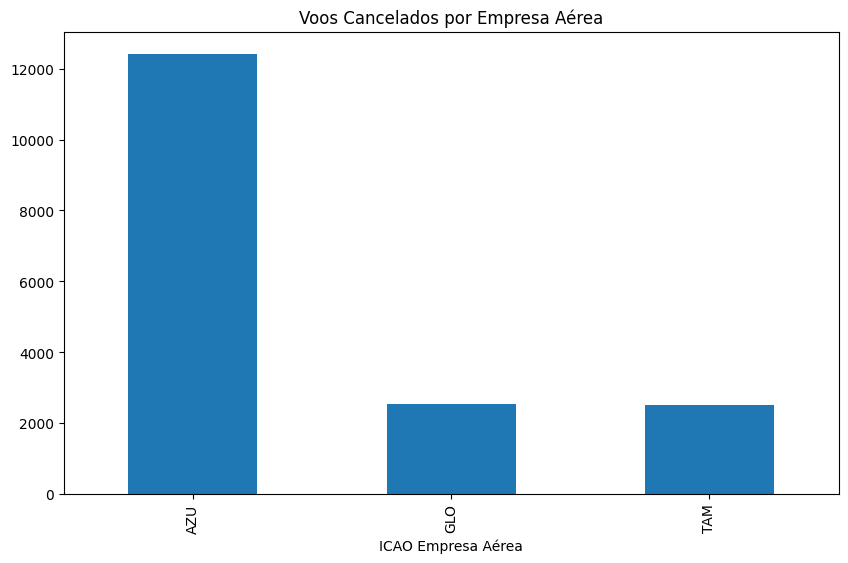

In [886]:
#fazer uma projeção mensal 
voos_cancelados = datasets2018_original[datasets2018_original['Situação Voo'] == 'CANCELADO']
if not voos_cancelados.empty:
    plt.figure(figsize=(10, 6))
    plot = voos_cancelados['ICAO Empresa Aérea'].value_counts().plot(kind="bar")
    plot.set_title("Voos Cancelados por Empresa Aérea")
    plt.show()
else:
    print("Não há voos cancelados para exibir.")

In [1148]:
lista_datasets2018['ICAO Empresa Aérea'].value_counts()

ICAO Empresa Aérea
AZU    22431
GLO    21922
TAM    17454
Name: count, dtype: int64

Text(0.5, 1.0, 'voos por COMPANHIA por Aerodromo de partida - GOL ')

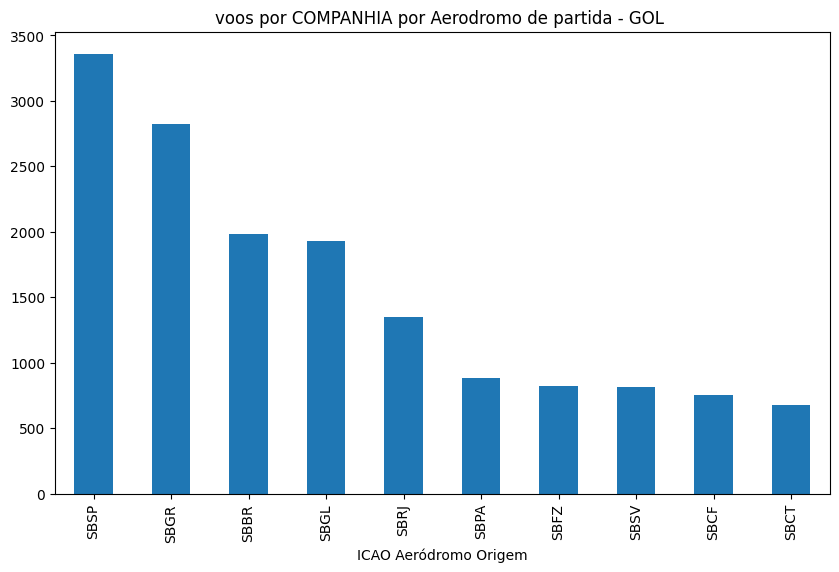

In [1147]:
voos_efetivados = lista_datasets2018[(lista_datasets2018['Situação Voo'] == 'REALIZADO')& (lista_datasets2018['ICAO Empresa Aérea']=='GLO')]

plt.figure(figsize=(10,6))
plot = voos_efetivados['ICAO Aeródromo Origem'].value_counts().head(10).plot(kind="bar")

plot.set_title("voos por COMPANHIA por Aerodromo de partida - GOL ")



Text(0.5, 1.0, 'voos por COMPANHIA por Aerodromo de partida - TAM ')

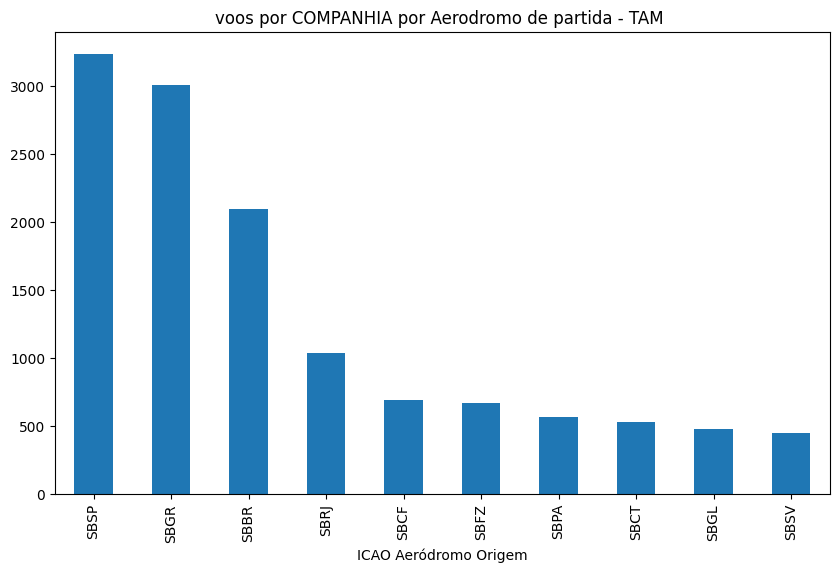

In [572]:
voos_efetivados = lista_datasets2018[(lista_datasets2018['ICAO Empresa Aérea']=='TAM') & (lista_datasets2018['Situação Voo'] == 'REALIZADO')]
#lista_datasets2018['Situação Voo'] == 'REALIZADO'
plt.figure(figsize=(10,6))
plot = voos_efetivados['ICAO Aeródromo Origem'].value_counts().head(10).plot(kind="bar")

plot.set_title("voos por COMPANHIA por Aerodromo de partida - TAM ")

Text(0.5, 1.0, 'voos por COMPANHIA por Aerodromo de partida - AZUL')

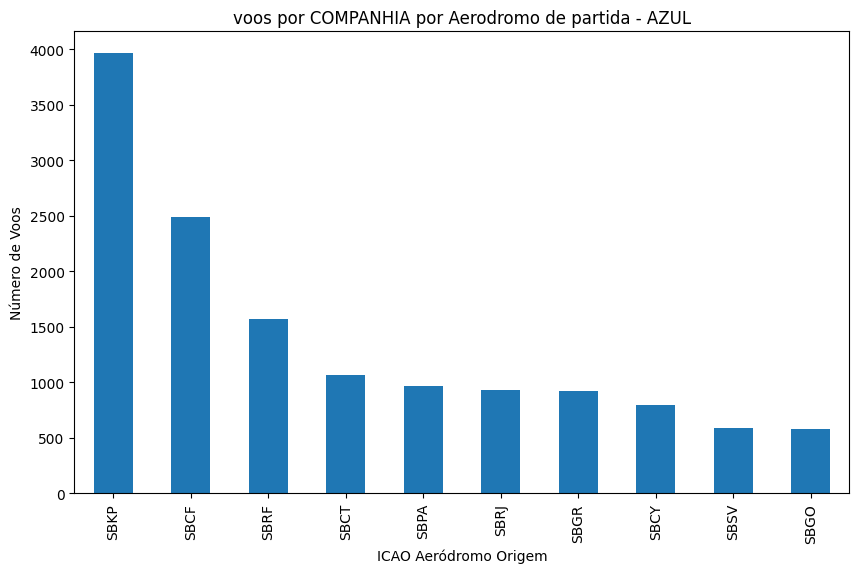

In [573]:
voos_efetivados = lista_datasets2018[(lista_datasets2018['Situação Voo'] == 'REALIZADO') & (lista_datasets2018['ICAO Empresa Aérea']=='AZU')]
#
plt.figure(figsize=(10,6))
plot = voos_efetivados['ICAO Aeródromo Origem'].value_counts().head(10).plot(kind="bar")
plot.set_ylabel("Número de Voos")
plot.set_title("voos por COMPANHIA por Aerodromo de partida - AZUL")

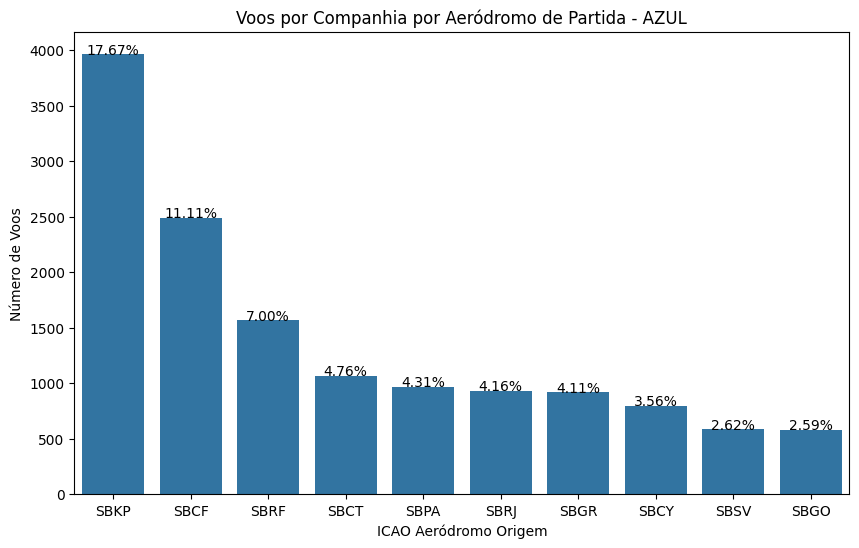

In [574]:

voos_efetivados = lista_datasets2018[(lista_datasets2018['ICAO Empresa Aérea'] == 'AZU') & (lista_datasets2018['Situação Voo'] == 'REALIZADO')]

# Obtém os 10 principais valores do ICAC Aeródromo Origem
top_aerodromos = voos_efetivados['ICAO Aeródromo Origem'].value_counts().head(10)
#voos_realizados


# Cria o gráfico de barras com seaborn
plt.figure(figsize=(10, 6))
plot = sns.barplot(x=top_aerodromos.index, y=top_aerodromos.values)

# Adiciona rótulo ao eixo y
plt.ylabel("Número de Voos")

# Adiciona título ao gráfico
plt.title("Voos por Companhia por Aeródromo de Partida - AZUL")

# Adiciona porcentagens às legendas
total = len(voos_efetivados['ICAO Aeródromo Origem'])
for i, value in enumerate(top_aerodromos):
    percent = value / total * 100
    plt.text(i, value + 0.5, f'{percent:.2f}%', ha="center")

# Exibe o gráfico
plt.show()

Text(0.5, 1.0, 'voos por Aerodromo de destino -VISÃO GERAL ')

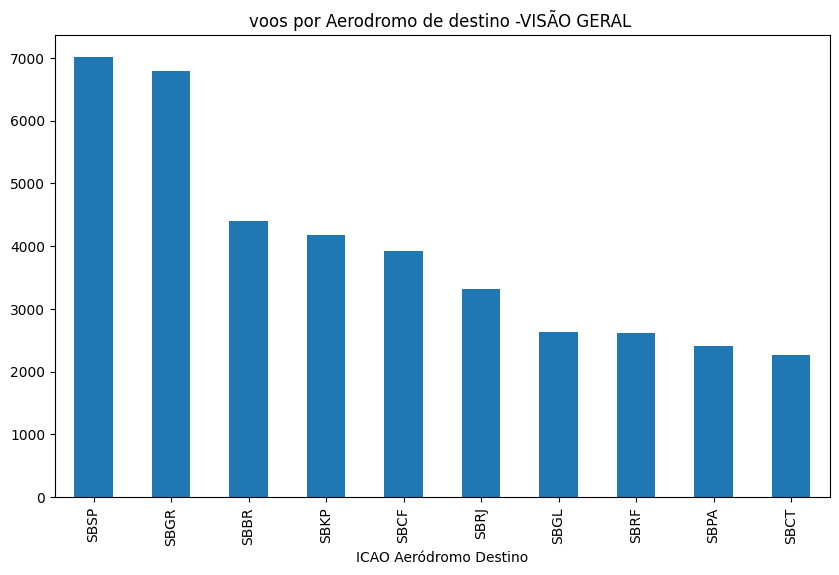

In [575]:
voos_efetivados = lista_datasets2018[lista_datasets2018['Situação Voo'] == 'REALIZADO']
plt.figure(figsize=(10,6))
plot = voos_efetivados['ICAO Aeródromo Destino'].value_counts().head(10).plot(kind="bar")

plot.set_title("voos por Aerodromo de destino - VISÃO GERAL ")

cont_historico: historico de voos, contador